In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_calc = pd.read_csv('../result/calc.csv',sep=' ', index_col=False)

In [3]:
data_calc

,N,<x>,<y>,<R>,<x^2>,<y^2>,<Δx^2>,<Δy^2>,<ΔR^2>
0,0,0.002678,-0.000333,0.002699,0.497773,0.488934,0.497766,0.488934,9.867000e-01
1,1000,-0.046576,0.052220,0.069973,501.659000,501.881000,501.657000,501.878000,1.003540e+03
2,2000,-0.038646,0.015593,0.041673,1003.590000,995.093000,1003.590000,995.093000,1.998680e+03
3,3000,-0.137448,0.012046,0.137975,1503.460000,1502.940000,1503.450000,1502.940000,3.006380e+03
4,4000,-0.124274,-0.034817,0.129059,1991.050000,2002.130000,1991.040000,2002.130000,3.993170e+03
...,...,...,...,...,...,...,...,...,...
995,995000,-2.128890,2.954490,3.641590,499050.000000,500376.000000,499045.000000,500367.000000,9.994120e+05
996,996000,-2.094020,3.055810,3.704440,499584.000000,500996.000000,499579.000000,500987.000000,1.000570e+06
997,997000,-2.081370,3.038160,3.682730,499939.000000,501563.000000,499935.000000,501554.000000,1.001490e+06
998,998000,-1.945610,3.150860,3.703160,500423.000000,502085.000000,500419.000000,502075.000000,1.002490e+06


In [109]:
x = np.log(data_calc['N'])
y = np.log(data_calc['<ΔR^2>'])
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [110]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [111]:
b = slope 
a = 10**intercept 
a,b

(np.float64(nan), np.float64(nan))

In [112]:
def power_law(x, a, b):
    return a * x**b
x_data = data_calc['N'].values
y_data = data_calc['<ΔR^2>'].values

In [114]:
initial_guess = [1, 1]  # a = 1, b = 1

# Аппроксимация
params, covariance = curve_fit(power_law, x_data, y_data, p0=initial_guess)
a_opt, b_opt = params

print(f"Оптимальное a: {a_opt}")
print(f"Оптимальное b: {b_opt}")

Оптимальное a: 0.9753165546466029
Оптимальное b: 1.0021190381099756


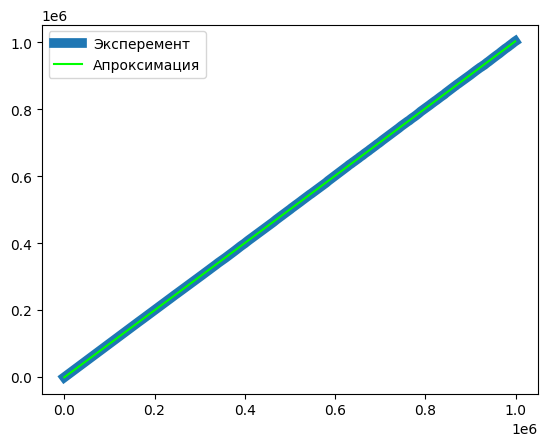

In [129]:

plt.plot(data_calc['N'],data_calc['<ΔR^2>'],label='Эксперемент',linewidth=7)
plt.plot(data_calc['N'],power_law(data_calc['N'],a_opt,b_opt),label='Апроксимация',color='lime')
plt.legend()

In [5]:
# data_first_particle = pd.read_csv('../result/first_particle.csv',sep=' ', index_col=False)

In [6]:
data_first_particle

,x,y
0,0.00000,0.228116
1,0.00000,-0.500578
2,-0.10528,-0.500578
3,-0.10528,3.560490
4,-1.45111,3.560490
...,...,...
999995,446.04200,1101.300000
999996,446.04200,1100.450000
999997,446.04200,1101.370000
999998,446.74300,1101.370000


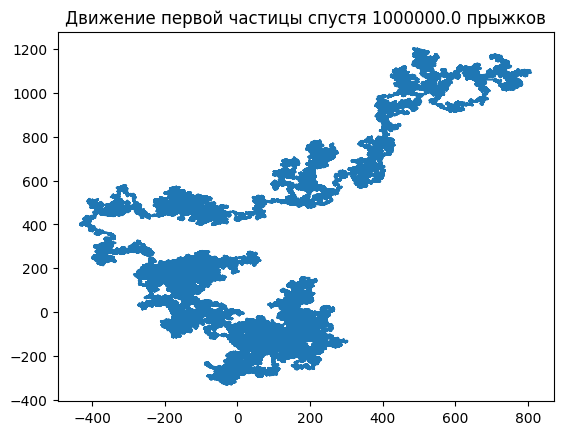

In [18]:
plt.title(f'Движение первой частицы спустя {1e6} прыжков')
plt.plot(data_first_particle.x,data_first_particle.y)

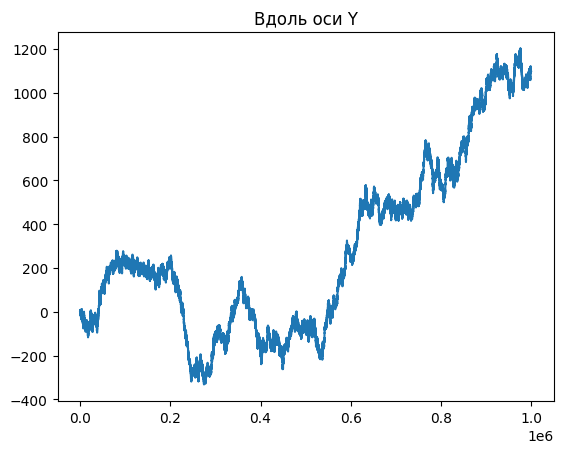

In [29]:
plt.title(f'Вдоль оси Y')
plt.plot(data_first_particle.y)

In [8]:
data_last_vals = pd.read_csv('../result/last_vals.csv',sep=' ', index_col=False)

In [9]:
data_last_vals

,x,y
0,446.7430,1100.5500
1,-98.3595,142.0300
2,173.6900,441.8050
3,-221.2160,-466.2680
4,-578.8090,-1202.5400
...,...,...
99995,143.3520,-1054.9500
99996,-1468.3500,-393.7380
99997,-591.1540,-827.0590
99998,-405.6770,-96.0541


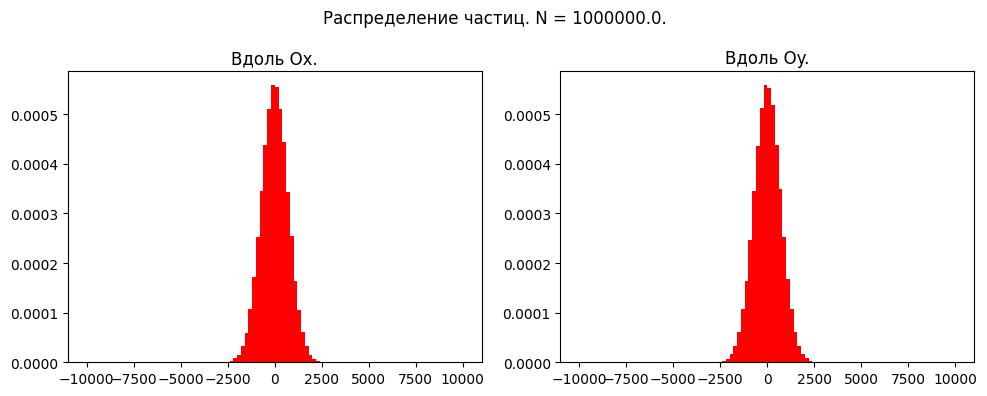

In [14]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частиц. N = {1e6}.')

plt.subplot(1,2,1)
plt.hist(data_last_vals.x, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e4, 1e4))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(data_last_vals.y, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e4, 1e4))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()

In [43]:
A = 2
def f_small(l):
    return A*l/(l**4 + 1) ** (3/2)
sig = 2 / (f_small(0.1)*np.sqrt(2*np.pi) )

In [44]:
sig

np.float64(3.990021232395015)

In [45]:
bin_cnt = 100  # кол-во столбиков
bin_w = 1 / bin_cnt
rng = (0, 10)  # диапазон отрисовки

_r = lambda x: 2 / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x ** 2) / (2 * sig ** 2))

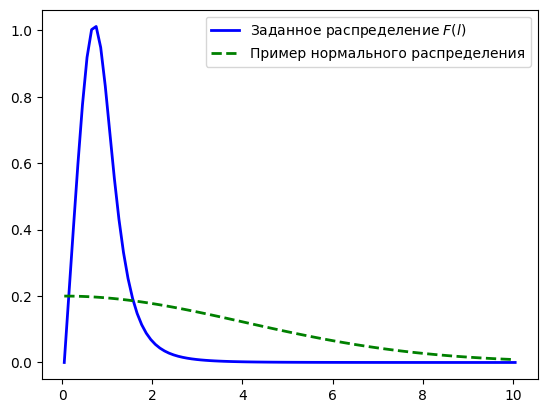

In [46]:
x_vals = np.linspace(rng[0], rng[1], bin_cnt)
plt.plot(x_vals + (rng[1] - rng[0]) * 0.5 * bin_w, f_small(x_vals), 'b-', label='Заданное распределение $F(l)$', linewidth=2)
plt.plot(x_vals + (rng[1] - rng[0]) * 0.5 * bin_w, _r(x_vals), 'g--', label='Пример нормального распределения', linewidth=2)
plt.legend()